In [9]:
import pandas as pd
import geopandas as gpd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')

In [10]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\probability maps\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed)
crustal_abundance=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\crustal_abundance.csv',encoding = "ISO-8859-1")
thresholds = crustal_abundance.iloc[5]*5

In [11]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})


In [12]:
frame['HUC_12']=frame.HUC_12.astype(str)

In [16]:
CaptainHucstable = huc12.merge(frame, on='HUC_12' )
pruned = CaptainHucstable[CaptainHucstable['prob']>0]

In [66]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact
%matplotlib nbagg

formations = sorted(CaptainHucstable['formation'].unique().tolist())
elements = sorted(CaptainHucstable['element'].unique().tolist())
 
def view(formation='', element='', concentration=''):
    
    try:
        fig, ax = plt.subplots()
        pruned[(pruned['formation']==formation) & (pruned['element']==element) &
               (pruned['bins_ppm']>concentration)].plot(ax=ax, 
                    column='prob', cmap='OrRd', legend=True)
        huc12.plot(ax=ax, alpha=0.1)
    except:
        print('This combination does not exist')
    


w = widgets.Select(options=formations)
v = widgets.Select(options=elements)
u = widgets.FloatText(value=1)
t = widgets.Select(options=cutoff)
interact(view, formation=w, element=v, concentration=u, cutoffs=t)
#interact(view, y=v)

interactive(children=(Select(description='formation', options=('Absaroka Volcanic Supergroup: Hominy Peak Form…

<function __main__.view>

In [57]:
crustal_abundance=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\crustal_abundance.csv')

In [85]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact
%matplotlib nbagg

formations = sorted(CaptainHucstable['formation'].unique().tolist())
elements = sorted(CaptainHucstable['element'].unique().tolist())
 
def view2(formation='', element=''):
    
    try:
        fig, ax = plt.subplots()
        pruned[(pruned['formation']==formation) & (pruned['element']==element) &
               (pruned['bins_ppm']>=crustal_abundance[element][5]*5)].plot(ax=ax, 
                    column='prob', cmap='OrRd', legend=True)
        huc12.plot(ax=ax, alpha=0.1)
    except:
        print('This combination does not exist')
    


w = widgets.Select(options=formations)
v = widgets.Select(options=elements)

interact(view2, formation=w, element=v)
#interact(view, y=v)

interactive(children=(Select(description='formation', options=('Absaroka Volcanic Supergroup: Hominy Peak Form…

<function __main__.view2>

<IPython.core.display.Javascript object>


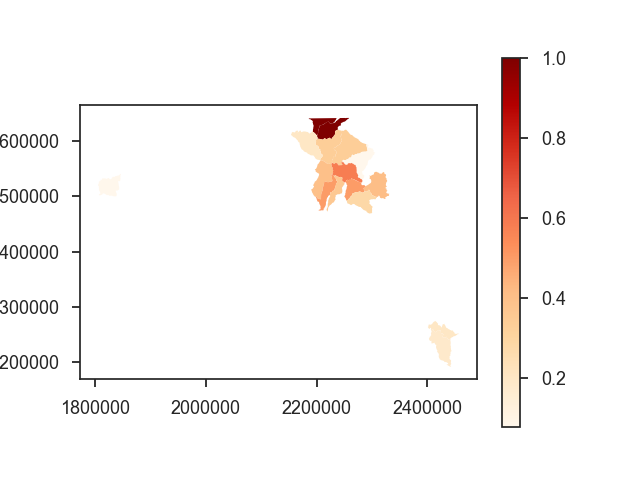

In [90]:

pruned[(pruned['formation']=='Bighorn Dolomite') & (pruned['element']=='sb_ppm') &
               (pruned['bins_ppm']>=crustal_abundance['sb_ppm'][5]*5)].plot( 
                    column='prob', cmap='OrRd', legend=True)


In [89]:
crustal_abundance['ag_ppm'][5]*5

0.375